# Requirement 1 - Text classification

In [81]:
import pandas as pd
import gensim
import gc
from gensim.utils import simple_preprocess
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, HashingVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [40]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,Title,Content,Label
0,227464,"Netflix is coming to cable boxes, and Amazon i...",if you subscribe to one of three rinky-dink (...,Entertainment
1,244074,"Pharrell, Iranian President React to Tehran 'H...","pharrell, iranian president react to tehran '...",Entertainment
2,60707,Wildlife service seeks comments,the u.s. fish and wildlife service has reopen...,Technology
3,27883,Facebook teams up with Storyful to launch 'FB ...,the very nature of social media means it is o...,Technology
4,169596,Caesars plans US$880 mln New York casino,caesars plans us$880 mln new york casino jul ...,Business


In [41]:
df = df.drop(['Id'], axis = 1)

## Question 1a - Word Cloud

In [6]:
labels = df['Label'].unique()

In [7]:
labels

array(['Entertainment', 'Technology', 'Business', 'Health'], dtype=object)

In [8]:
def generate_wordcloud(label):
    label_data = df[df['Label'] == label]
    wordcloud = WordCloud(max_font_size=40, background_color='white').generate(
                label_data['Title'].to_string(index=False))
    plt.title(label + " ({})".format(label_data.size))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

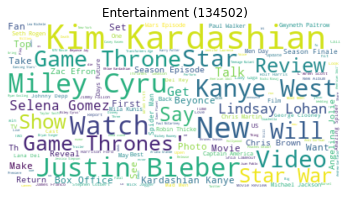

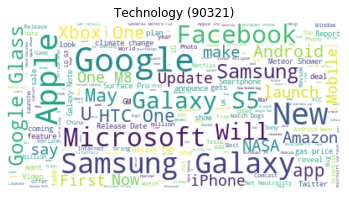

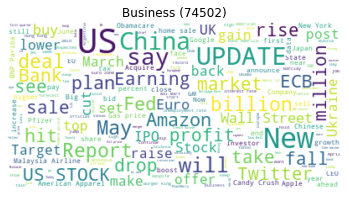

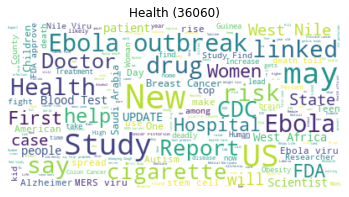

In [9]:
for label in labels:
    generate_wordcloud(label)

## Question 1b - Classification Task

Below, we can see that the classes are imbalanced.

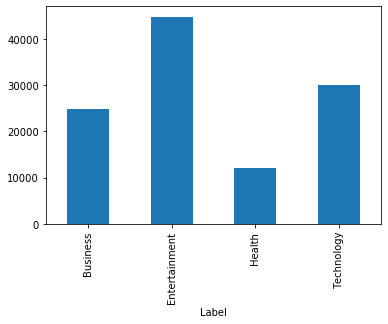

In [10]:
fig = plt.figure()
df.groupby('Label').Title.count().plot.bar()
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111795 entries, 0 to 111794
Data columns (total 3 columns):
Title      111795 non-null object
Content    111795 non-null object
Label      111795 non-null object
dtypes: object(3)
memory usage: 2.6+ MB


In [43]:
# Remove articles with duplicate content

df.drop_duplicates(subset = 'Content', keep = 'last', inplace = True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109984 entries, 0 to 111794
Data columns (total 3 columns):
Title      109984 non-null object
Content    109984 non-null object
Label      109984 non-null object
dtypes: object(3)
memory usage: 3.4+ MB


In [14]:
# Relative frequency of labels

df.groupby('Label').count() / len(df)

,Title,Content
Label,,
Business,0.221905,0.221905
Entertainment,0.400131,0.400131
Health,0.107797,0.107797
Technology,0.270167,0.270167


In [16]:
vectorizer = HashingVectorizer()

In [55]:
kf = KFold(n_splits=5, random_state=56)
svm = LinearSVC()
random_forest = RandomForestClassifier(bootstrap=False)
stop_words = ENGLISH_STOP_WORDS

In [73]:
X = df['Content'].values
y = df['Label'].values

In [ ]:
# text_clf_pipeline = Pipeline([
#                     ('vect', vectorizer(stop_words=stop_words)),
#                     ('clf', svm()),
#                     ])

In [57]:
for train, cv in kf.split(X, y):
    X_train, X_cv = X[train], X[cv]#.to_dense() in all those might work!
    y_train, y_cv = y[train], y[cv]
    X_train_gen = [x for x in X_train]
    X_train_vec = vectorizer.transform(X_train_gen)
    svm.fit(X_vector, y_train)
    X_cv_gen = [x for x in X_cv]
    X_cv_vec = vectorizer.transform(X_cv_gen)
    y_pred = svm.predict(X_cv_vec)
    print(classification_report(y_pred, y_cv, 
                                target_names=labels))

               precision    recall  f1-score   support

Entertainment       0.90      0.94      0.92      4704
   Technology       0.99      0.96      0.97      9048
     Business       0.92      0.98      0.95      2179
       Health       0.95      0.93      0.94      6066

     accuracy                           0.95     21997
    macro avg       0.94      0.95      0.95     21997
 weighted avg       0.95      0.95      0.95     21997

               precision    recall  f1-score   support

Entertainment       0.94      0.95      0.94      4892
   Technology       0.99      0.99      0.99      8769
     Business       0.96      0.98      0.97      2332
       Health       0.96      0.95      0.96      6004

     accuracy                           0.97     21997
    macro avg       0.96      0.97      0.96     21997
 weighted avg       0.97      0.97      0.97     21997

               precision    recall  f1-score   support

Entertainment       0.90      0.93      0.92      4657
   

ValueError: Found input variables with inconsistent numbers of samples: [87987, 87988]

WHAT THE FACK

In [59]:
for train, cv in kf.split(X, y):
    X_train, X_cv = X[train], X[cv]
    y_train, y_cv = y[train], y[cv]
    X_train_gen = [x for x in X_train]
    X_train_vec = vectorizer.transform(X_train_gen)
    random_forest.fit(X_vector, y_train)
    X_cv_gen = [x for x in X_cv]
    X_cv_vec = vectorizer.transform(X_cv_gen)
    y_pred = random_forest.predict(X_cv_vec)
    print(classification_report(y_pred, y_cv, 
                                target_names=labels))

/home/dimitriosrou/anaconda3/envs/ml_gpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


               precision    recall  f1-score   support

Entertainment       0.27      0.27      0.27      4984
   Technology       0.46      0.44      0.45      9036
     Business       0.14      0.15      0.15      2224
       Health       0.31      0.32      0.31      5753

     accuracy                           0.34     21997
    macro avg       0.29      0.30      0.30     21997
 weighted avg       0.34      0.34      0.34     21997

               precision    recall  f1-score   support

Entertainment       0.82      0.82      0.82      4915
   Technology       0.96      0.87      0.91      9683
     Business       0.73      0.93      0.82      1871
       Health       0.79      0.85      0.82      5528

     accuracy                           0.86     21997
    macro avg       0.82      0.87      0.84     21997
 weighted avg       0.87      0.86      0.86     21997

               precision    recall  f1-score   support

Entertainment       0.27      0.26      0.26      4984
   

ValueError: Number of labels=87988 does not match number of samples=87987

### Custom model with Gensim (or maybe not)

In [ ]:
dictionary = gensim.corpora.Dictionary([simple_preprocess(content, deacc=True) for content in df['Content']])
dictionary.filter_extremes(no_below=int(0.001*len(df)) , no_above=0.401)
corpus = [dictionary.doc2bow(simple_preprocess(content, deacc=True)) for content in df['Content']]

In [ ]:
print(dictionary)

In [ ]:
print(len(corpus))

In [ ]:
corpus[15]

In [ ]:
dictionary[1436]

In [ ]:
bow = np.array(corpus)

In [ ]:
dictionary.save('bowdict.dict')
gensim.corpora.MmCorpus.serialize('bow_corpus.mm',corpus)

In [ ]:
bigram = gensim.models.phrases.Phrases([simple_preprocess(content, deacc=True) for content in df['Content']], 
                                       min_count=10, threshold=20)

In [ ]:
print(bigram)

In [60]:
loaded_dict = gensim.corpora.Dictionary.load('bowdict.dict')
corpus = gensim.corpora.MmCorpus('bow_corpus.mm')

In [61]:
tfidf = gensim.models.TfidfModel(corpus)

In [63]:
corp_tran = tfidf.__getitem__

In [64]:
corp_tran

<bound method TfidfModel.__getitem__ of <gensim.models.tfidfmodel.TfidfModel object at 0x7f0862400828>>

In [69]:
corpus = corp_tran(corpus)

In [71]:
#X = gensim.matutils.corpus2dense(corpus, num_terms=15321, num_docs=109984)

In [ ]:
#X.shape

In [ ]:
#X = X.transpose()

In [ ]:
#X.shape

In [84]:
skf = StratifiedKFold(n_splits=5, random_state=56)

In [75]:
X = df['Content']
y = df['Label']

In [85]:
vectorizer = HashingVectorizer()

In [79]:
for train, cv in skf.split(X, y):
    X_train, X_cv = X.iloc[train], X.iloc[cv]
    y_train, y_cv = y.iloc[train], y.iloc[cv]
    X_train_gen = [x for x in X_train]
    dictionary = gensim.corpora.Dictionary([simple_preprocess(x, deacc=True) for x in X_train])
    dictionary.filter_extremes(no_below=int(0.001*len(df)) , no_above=0.401)
    corpus = [dictionary.doc2bow(simple_preprocess(x, deacc=True)) for x in X_train]
    tfidf = gensim.models.TfidfModel(corpus)
    X_train_vec = vectorizer.transform(X_train_gen)
    X_train_vec_tfidf = tfidf(X_train_vec)
    svm.fit(X_vector, y_train)
    X_cv_gen = [x for x in X_cv]
    X_cv_vec = tfidf(X_cv_gen)
    y_pred = svm.predict(X_cv_vec)
    print(classification_report(y_pred, y_cv, 
                                target_names=labels))

TypeError: 'TfidfModel' object is not callable

# HELP:

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html#sklearn.feature_extraction.text.HashingVectorizer

https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py

https://scikit-learn.org/stable/modules/feature_extraction.html

https://radimrehurek.com/gensim/models/lsimodel.html


DES TO 18 EDW!
https://www.machinelearningplus.com/nlp/gensim-tutorial/